# Importing Essential Libraries

In [ ]:
import numpy as np
import pandas as pd
!pip install kaggle
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Getting the dataset from kaggle

In [ ]:
 ! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
 !cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download ejlok1/cremad
! kaggle datasets download uwrfkaggler/ravdess-emotional-speech-audio

Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)
cremad.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0
 99% 426M/429M [00:02<00:00, 225MB/s]
100% 429M/429M [00:02<00:00, 181MB/s]


#Making Directories of the dataset in our notebook

In [ ]:
import os
import librosa
import librosa.display
import seaborn as sns
import tensorflow as tf
import keras
import zipfile
Cremad= '/content/cremad.zip'
Ravdess= '/content/ravdess-emotional-speech-audio.zip'
with zipfile.ZipFile(Cremad, 'r') as zip_ref:
    zip_ref.extractall('/content/Cremad')
with zipfile.ZipFile(Ravdess, 'r') as zip_ref:
    zip_ref.extractall('/content/Ravdess')
Cremad_dir='/content/Cremad'
Ravdess_dir='/content/Ravdess'

ravdess_contents=os.listdir(Ravdess_dir)

cremad_contents=os.listdir(Cremad_dir)



Contents of Ravdess directory:
Actor_21
Actor_04
Actor_13
Actor_02
Actor_16
Actor_10
Actor_07
Actor_19
Actor_24
Actor_05
Actor_11
Actor_17
Actor_12
Actor_01
audio_speech_actors_01-24
Actor_15
Actor_18
Actor_20
Actor_09
Actor_06
Actor_23
Actor_03
Actor_08
Actor_14
Actor_22
Contents of Cremad directory:
AudioWAV


# Traversing Ravdess directory and making a dataframe with details like emotion and paths

In [ ]:
emotion=[]
file_path=[]
for dirpath, dirnames, filenames in os.walk(Ravdess_dir):
  for file in filenames:
    if file.endswith(".wav"):
      parts = file.split('-')
      if len(parts)>2:
        emotion = int(parts[2])
        emotion.append(emotion)
        file_path.append(os.path.join(dirpath, file))
emotion_df=pd.DataFrame({
    'Emotions': emotion,
    'Path': file_path
})
emotion_df.Emotions.replace({
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}, inplace=True)

print(emotion_df)

       Emotions                                               Path
0           sad  /content/Ravdess/Actor_21/03-01-04-02-01-02-21...
1          calm  /content/Ravdess/Actor_21/03-01-02-02-02-02-21...
2           sad  /content/Ravdess/Actor_21/03-01-04-01-02-02-21...
3     surprised  /content/Ravdess/Actor_21/03-01-08-01-01-02-21...
4       disgust  /content/Ravdess/Actor_21/03-01-07-01-01-01-21...
...         ...                                                ...
2875       calm  /content/Ravdess/Actor_22/03-01-02-01-01-02-22...
2876      happy  /content/Ravdess/Actor_22/03-01-03-01-01-01-22...
2877    disgust  /content/Ravdess/Actor_22/03-01-07-01-01-01-22...
2878      happy  /content/Ravdess/Actor_22/03-01-03-01-02-01-22...
2879      angry  /content/Ravdess/Actor_22/03-01-05-02-01-02-22...

[2880 rows x 2 columns]


<ipython-input-34-f9892a23353f>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  emotion_df.Emotions.replace({


# Traversing Cremad directory and making a dataframe with details like emotion and paths



In [ ]:
from sys import path_hooks
emotion_cremad=[]
file_path_cremad=[]
for root, dirs, files in os.walk(Cremad_dir):
  for file in files:
    if file.endswith(".wav"):
      file_path_cremad.append(os.path.join(root, file))
      parts=file.split('.')[0].split('_')
      if parts[2] == 'SAD':
                emotion_cremad.append('sad')
      elif parts[2] == 'ANG':
                emotion_cremad.append('angry')
      elif parts[2] == 'DSG':
                emotion_cremad.append('disgust')
      elif parts[2] == 'FEA':
                emotion_cremad.append('fear')
      elif parts[2] == 'HPY':
                emotion_cremad.append('happy')
      elif parts[2] == 'NEU':
                emotion_cremad.append('neutral')
      else:
                emotion_cremad.append('Unknown')
emotion_df_cremad=pd.DataFrame(emotion_cremad, columns=['Emotions'])
path_df_cremad=pd.DataFrame(file_path_cremad, columns=['Path'])
crema_df=pd.concat([emotion_df_cremad, path_df_cremad], axis=1)
print(crema_df)
print(crema_df.Emotions)

     Emotions                                          Path
0       happy  /content/Cremad/AudioWAV/1028_IWW_HAP_XX.wav
1       angry  /content/Cremad/AudioWAV/1073_IEO_ANG_HI.wav
2        fear  /content/Cremad/AudioWAV/1025_IEO_FEA_MD.wav
3         sad  /content/Cremad/AudioWAV/1019_IWL_SAD_XX.wav
4       happy  /content/Cremad/AudioWAV/1048_IWL_HAP_XX.wav
...       ...                                           ...
7437  neutral  /content/Cremad/AudioWAV/1075_TSI_NEU_XX.wav
7438     fear  /content/Cremad/AudioWAV/1089_IWL_FEA_XX.wav
7439    happy  /content/Cremad/AudioWAV/1022_IWW_HAP_XX.wav
7440  disgust  /content/Cremad/AudioWAV/1036_ITS_DIS_XX.wav
7441  disgust  /content/Cremad/AudioWAV/1050_MTI_DIS_XX.wav

[7442 rows x 2 columns]
0         happy
1         angry
2          fear
3           sad
4         happy
         ...   
7437    neutral
7438       fear
7439      happy
7440    disgust
7441    disgust
Name: Emotions, Length: 7442, dtype: object


In [ ]:
data_path=pd.concat([emotion_df,crema_df],axis=0)
data_path.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fearful', 7: 'disgust', 8: 'surprise'}, inplace=True)
label=data_path['Emotions']
path=data_path['Path']
data_path.Emotions

,Emotions
0,sad
1,calm
2,sad
3,surprised
4,disgust
...,...
7437,neutral
7438,fear
7439,happy
7440,disgust


# Functions for sketching waveplot and spectrograms

In [ ]:
import matplotlib.pyplot as plt
def waveplot(data_path, sampling_rate, emotion, figsize=(10, 6)):
    plt.figure(figsize=figsize)
    plt.title("Waveplot for {}".format(emotion))
    librosa.display.waveshow(data_path, sr=sampling_rate)
    plt.show()

def spectrogram(data_path, sr, emotion, figsize=(10, 6)):
    mel_spect = librosa.stft(data_path)
    mel_spect = librosa.amplitude_to_db(mel_spect, ref=np.max)

    plt.figure(figsize=figsize)
    plt.title("Spectrogram for {}".format(emotion))
    librosa.display.specshow(mel_spect, sr=sr, x_axis='time', y_axis='mel')
    plt.show()

# Waveplot and Spectrogram for Sad

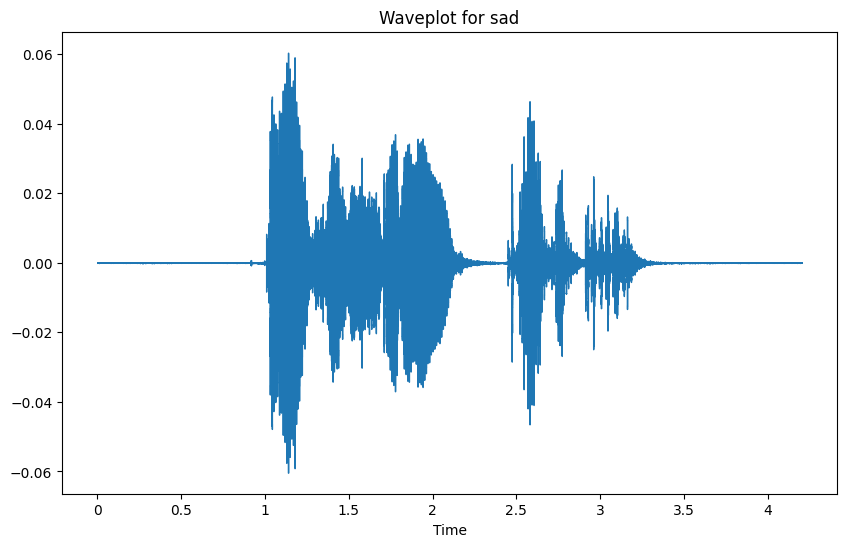

<ipython-input-61-0fb36557714d>:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect = librosa.amplitude_to_db(mel_spect, ref=np.max)


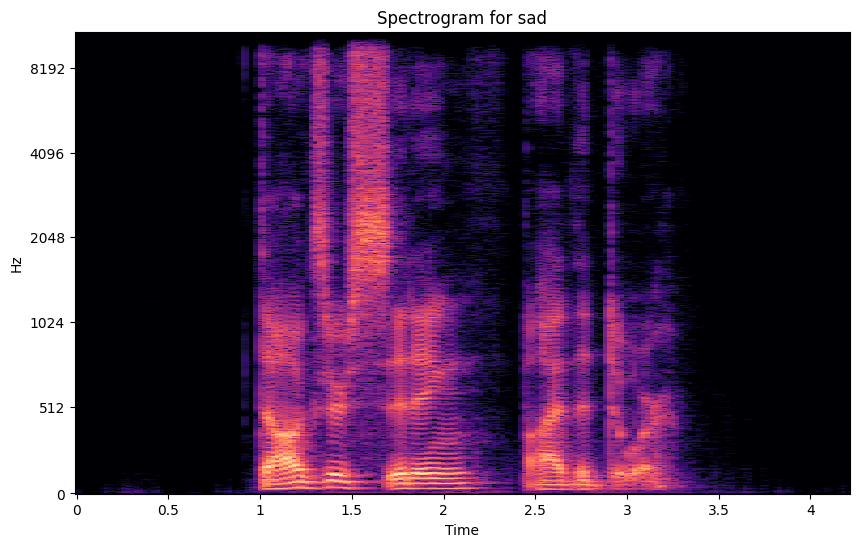

In [ ]:
from IPython.display import Audio
emotion = 'sad'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[1]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

# Waveplot and Spectrogram for Fear

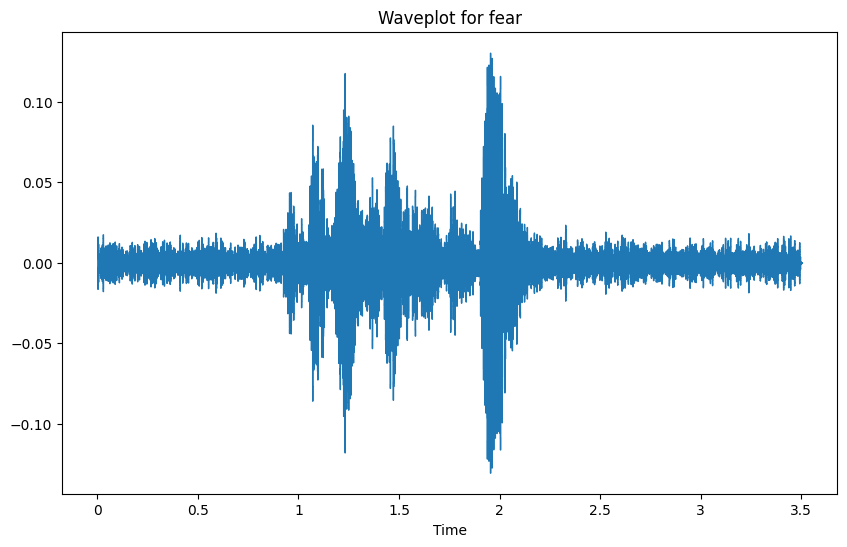

<ipython-input-61-0fb36557714d>:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect = librosa.amplitude_to_db(mel_spect, ref=np.max)


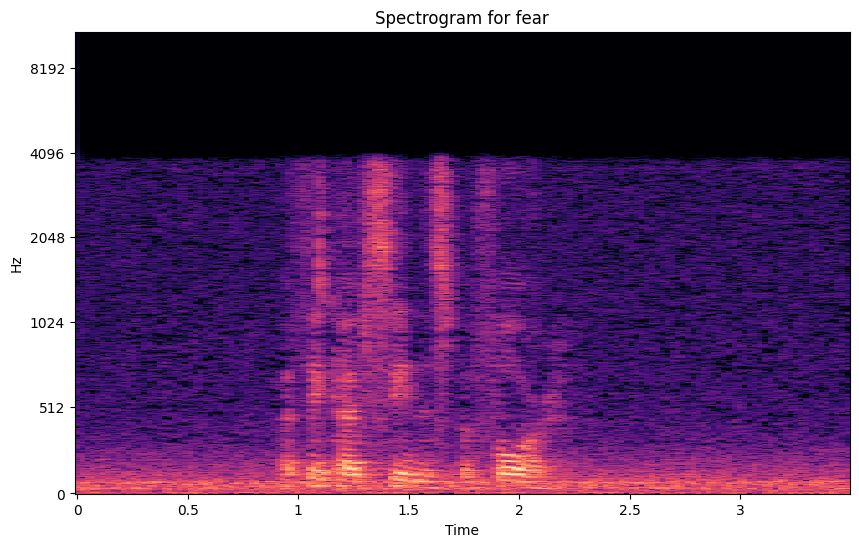

In [ ]:
emotion = 'fear'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[2]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

# Waveplot and Spectrogram for Angry

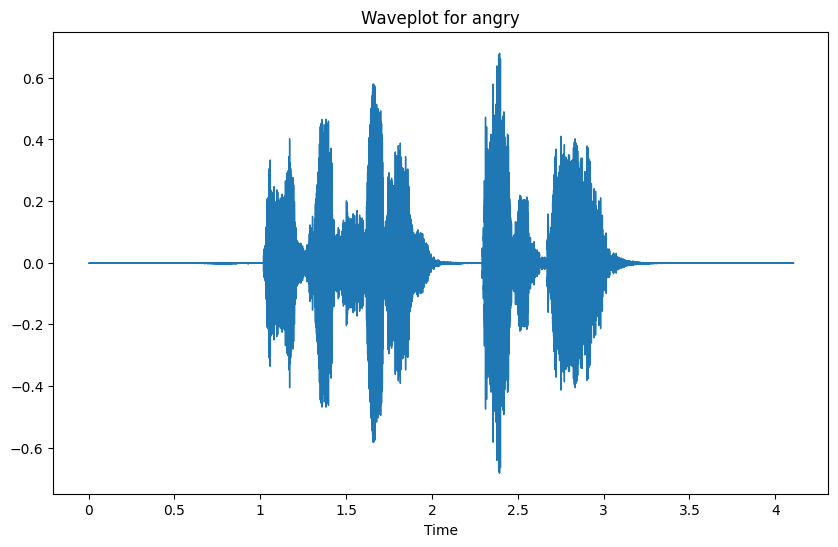

<ipython-input-61-0fb36557714d>:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect = librosa.amplitude_to_db(mel_spect, ref=np.max)


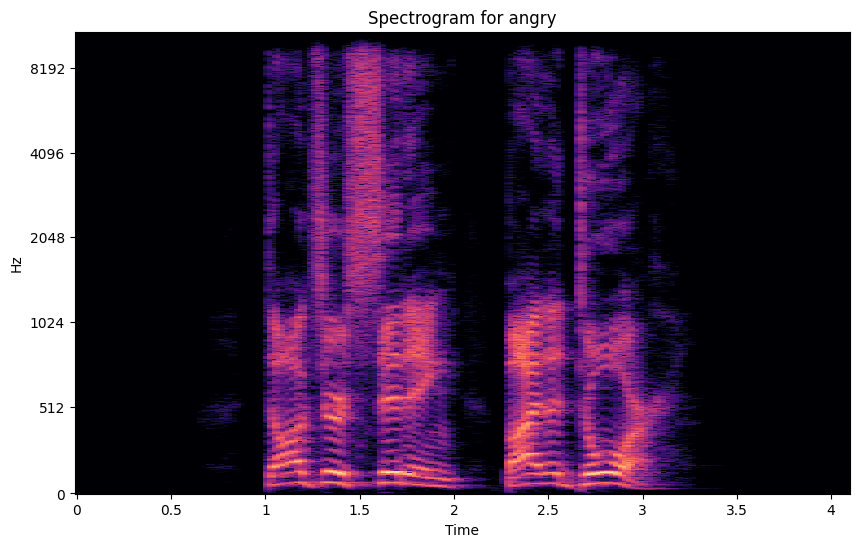

In [ ]:
emotion = 'angry'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[0]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

# Waveplot and Spectrogram for Neutral

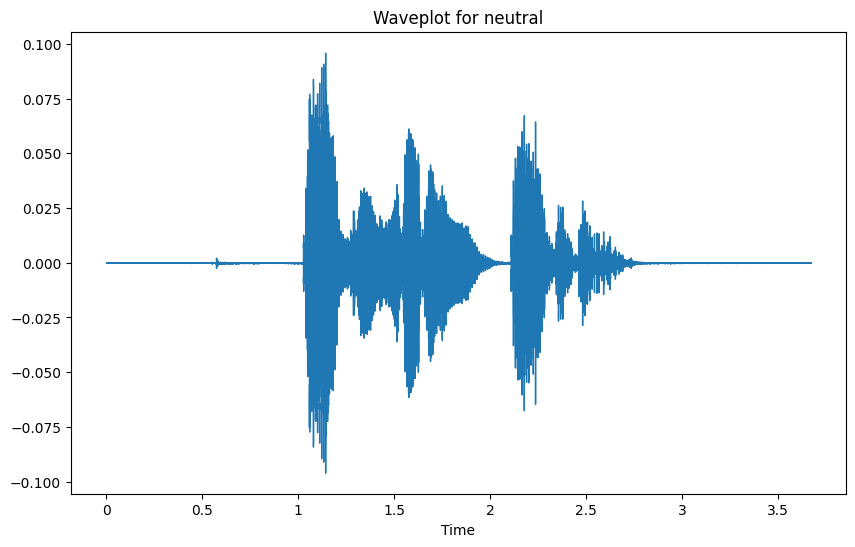

<ipython-input-61-0fb36557714d>:9: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel_spect = librosa.amplitude_to_db(mel_spect, ref=np.max)


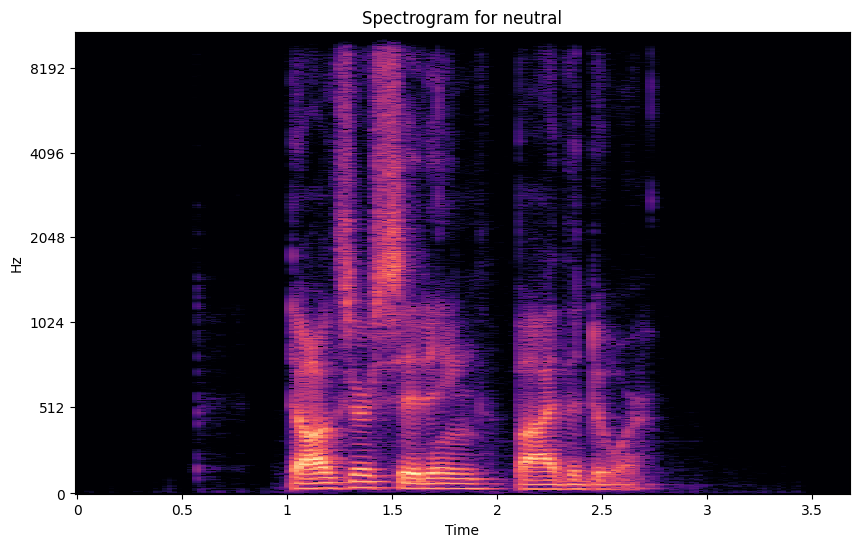

In [ ]:
emotion = 'neutral'
path = np.array(data_path.Path[data_path['Emotions']==emotion])[1]
path=path.replace('versions/1Actor','versions/1/Actor')
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

# Function to load audio file and extract its mfcc for 40 coefficients

In [ ]:
def extract_mfcc(filename):
    filename=str(filename)

    if os.path.isfile(filename):
     y, sr = librosa.load(filename, duration=4, offset=0)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc
    else:
      return None
extract_mfcc(data_path['Path'][0].iloc[0])

array([-5.0934735e+02,  6.4903328e+01, -1.4473682e+01,  1.2224912e+01,
        1.2452510e+01, -9.6233625e+00, -1.6836395e+01, -5.8336749e+00,
       -2.4084692e+01, -5.6237760e+00,  2.0528359e+00, -1.5411850e+01,
       -4.2003574e+00, -2.0550356e+00, -7.7415991e+00, -1.2409304e+00,
       -6.3322840e+00, -2.6117768e+00, -7.3412374e-02, -5.0500231e+00,
       -5.4603249e-01, -4.0638990e+00, -2.8227663e+00, -2.3027015e+00,
       -4.8481965e+00, -1.6027814e+00, -3.7138996e+00, -6.6363865e-01,
       -3.0616446e+00,  5.8972394e-01,  3.0447009e-01, -3.3728724e+00,
       -1.5090212e+00,  5.2374613e-01, -1.7366506e+00,  2.4920475e+00,
        2.0260639e+00,  2.6423504e+00,  5.9022713e-01,  2.7368643e+00],
      dtype=float32)

In [ ]:
X_mfcc = data_path['Path'].apply(lambda x: extract_mfcc(x)).dropna()
X_mfcc

,Path
0,"[-509.34735, 64.90333, -14.473682, 12.224912, ..."
1,"[-608.0181, 76.910805, -1.7398646, 18.734133, ..."
2,"[-625.4322, 68.36178, 2.3304257, 19.534231, 9...."
3,"[-564.2094, 54.835827, -1.1308357, 8.562176, 5..."
4,"[-550.9513, 59.54219, -3.6005766, 14.816942, 8..."
...,...
7437,"[-420.50058, 130.16397, 12.935782, 63.71146, -..."
7438,"[-443.17026, 124.7029, -0.7536296, 51.749836, ..."
7439,"[-392.41406, 140.08946, 12.9864, 46.16794, -6...."
7440,"[-370.40662, 128.79799, 12.671741, 52.57661, -..."


# Preprocessing the audio data and Training a 1D CNN model for multi classification of emotions of audio

In [ ]:
from sklearn.preprocessing import OneHotEncoder


X_filtered = [x for x in X_mfcc if x is not None]
y_filtered = emotion_df['Emotions'].iloc[:len(X_filtered)].values

X = np.expand_dims(X_filtered, -1)
encode = OneHotEncoder()
y_encoded = encode.fit_transform(y_filtered.reshape(-1, 1)).toarray()
y_resized = np.resize(y_encoded, (10322, 8))
print(f"Shape of X: {X.shape}")
print(f"Shape of y_resized: {y_resized.shape}")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv1D(256, kernel_size=5, activation='relu', input_shape=(40, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=3),
    Dropout(0.15),
    Conv1D(512, kernel_size=5, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=3),
    Dropout(0.15),
    GlobalAveragePooling1D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(8, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(X, y_resized, epochs=50)


Shape of X: (10322, 40, 1)
Shape of y_resized: (10322, 8)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)                   │ (None, 36, 256)             │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 36, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_20 (MaxPooling1D)      │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ (None, 8, 512)              │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 8, 512)              │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_21 (MaxPooling1D)      │ (None, 2, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 2, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_7           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 826,760 (3.15 MB)

 Trainable params: 824,712 (3.15 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 39s 106ms/step - accuracy: 0.1563 - loss: 2.4140
Epoch 2/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 33s 102ms/step - accuracy: 0.1761 - loss: 2.0885
Epoch 3/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 48s 123ms/step - accuracy: 0.1872 - loss: 2.0208
Epoch 4/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 35s 104ms/step - accuracy: 0.1935 - loss: 1.9767
Epoch 5/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 40s 100ms/step - accuracy: 0.2097 - loss: 1.9604
Epoch 6/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.2062 - loss: 1.9456
Epoch 7/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 32s 100ms/step - accuracy: 0.2232 - loss: 1.9070
Epoch 8/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 37s 114ms/step - accuracy: 0.2348 - loss: 1.8941
Epoch 9/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 35s 107ms/step - accuracy: 0.2434 - loss: 1.8736
Epoch 10/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 39s 101ms/step - accuracy: 0.2406 - loss: 1.8802
Epoch 11/50
323/323 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step - accuracy: 0.2703 - loss: 1.8257
Epoch 12/50
323/323

# Splits the data in training and testing and calculates the accuracy of the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred_prob = model.predict(x_test)
y_pred_class = np.argmax(y_pred_prob, axis=1)
y_test_class = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy:.4f}")



65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Accuracy: 0.1419
Classification Report:
{'angry': {'precision': 0.18454935622317598, 'recall': 0.11025641025641025, 'f1-score': 0.13804173354735153, 'support': 390.0}, 'calm': {'precision': 0.13953488372093023, 'recall': 0.10843373493975904, 'f1-score': 0.12203389830508475, 'support': 332.0}, 'disgust': {'precision': 0.14241486068111456, 'recall': 0.152317880794702, 'f1-score': 0.1472, 'support': 302.0}, 'fearful': {'precision': 0.13008130081300814, 'recall': 0.05776173285198556, 'f1-score': 0.08, 'support': 277.0}, 'happy': {'precision': 0.1788756388415673, 'recall': 0.3, 'f1-score': 0.22411953041622198, 'support': 350.0}, 'neutral': {'precision': 0.09090909090909091, 'recall': 0.022900763358778626, 'f1-score': 0.036585365853658534, 'support': 131.0}, 'sad': {'precision': 0.08641975308641975, 'recall': 0.1320754716981132, 'f1-score': 0.1044776119402985, 'support': 159.0}, 'surprised': {'precision': 0.08679245283018867, 'recall': 0.18548387096774